In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-dataset/Mental Health Dataset.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)

from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/mental-health-dataset/Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
df.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [6]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [7]:
print('Percentage of Missing Values')
(df.isna().mean() * 100).round(1)

Percentage of Missing Values


Timestamp                  0.0
Gender                     0.0
Country                    0.0
Occupation                 0.0
self_employed              1.8
family_history             0.0
treatment                  0.0
Days_Indoors               0.0
Growing_Stress             0.0
Changes_Habits             0.0
Mental_Health_History      0.0
Mood_Swings                0.0
Coping_Struggles           0.0
Work_Interest              0.0
Social_Weakness            0.0
mental_health_interview    0.0
care_options               0.0
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [10]:
print('Number of duplicates: {:,}'.format(df.duplicated().sum()))
print('Percentage of duplicates: {:.1%}'.format(df.duplicated().mean()))

Number of duplicates: 2,304
Percentage of duplicates: 0.8%


In [11]:
df.drop_duplicates(inplace=True)
print('Number of duplicates: {:,}'.format(df.duplicated().sum()))

Number of duplicates: 0


In [12]:
df.drop(columns="Timestamp", inplace=True)

In [13]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [14]:
def countsplot(category):
    """
    Creates a count plot and returns a DataFrame with counts and percentages.

    Args:
        category (str): The column name for the categorical variable to plot.

    Returns:
        pandas.DataFrame: A DataFrame containing counts and percentages for each category.
    """

    category_counts = df[category].value_counts()
    category_percentages = df[category].value_counts(normalize=True)

    plt.figure(figsize=(8, 5))
    plt.bar(category_counts.index, category_counts.values, color=['steelblue', 'crimson', 'darkolivegreen'])
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.title(f"{category} Distribution")
    plt.tight_layout()
    plt.show()

    # Combine counts and percentages into a DataFrame
    stats_df = pd.DataFrame({
        "Count": category_counts,
        "Proportion": category_percentages
    })
    stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
    stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

    return stats_df


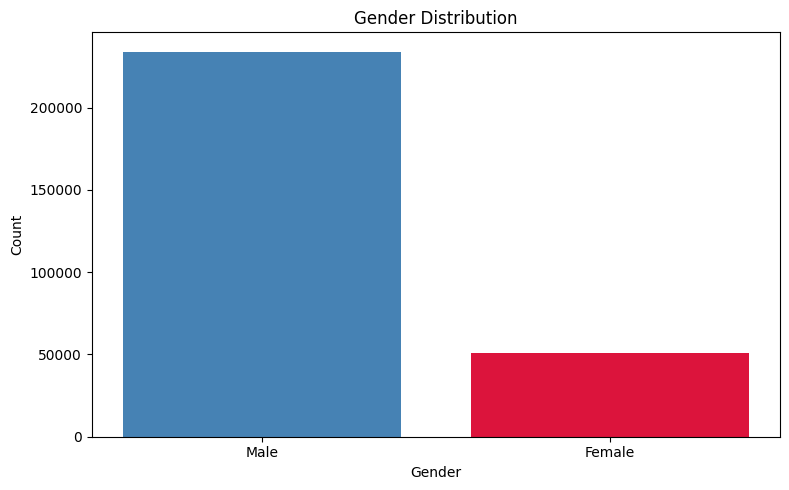

,Count,Proportion
Gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [15]:
countsplot("Gender")

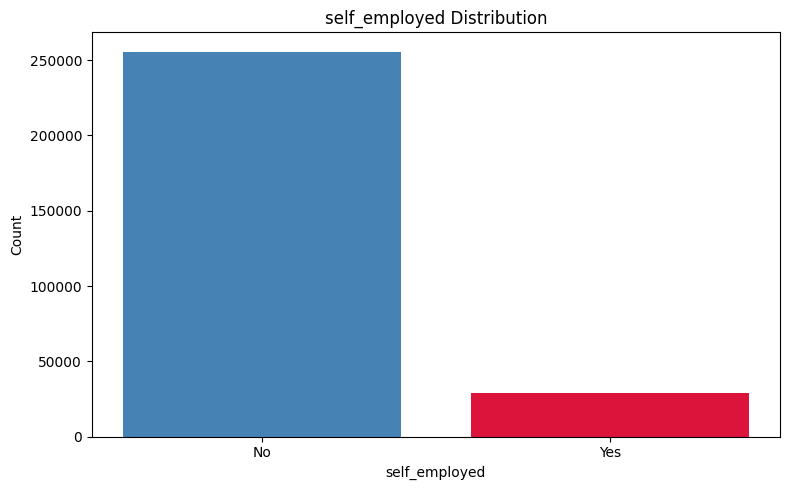

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [16]:
countsplot("self_employed")

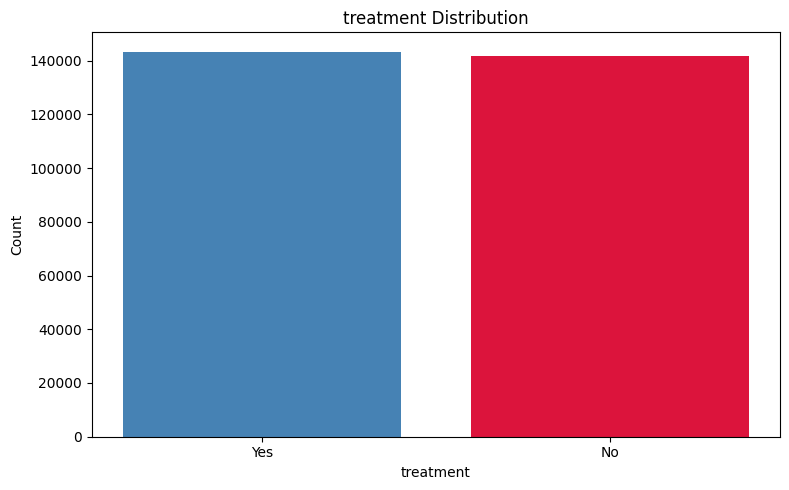

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [17]:
countsplot("treatment")

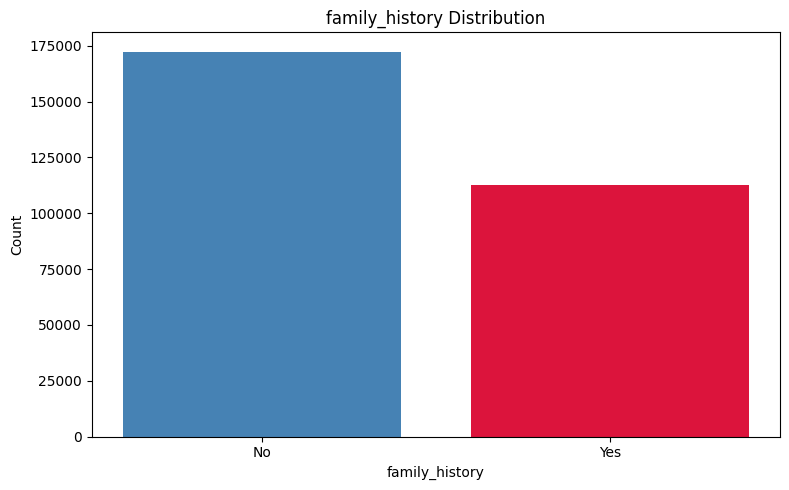

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [18]:
countsplot("family_history")

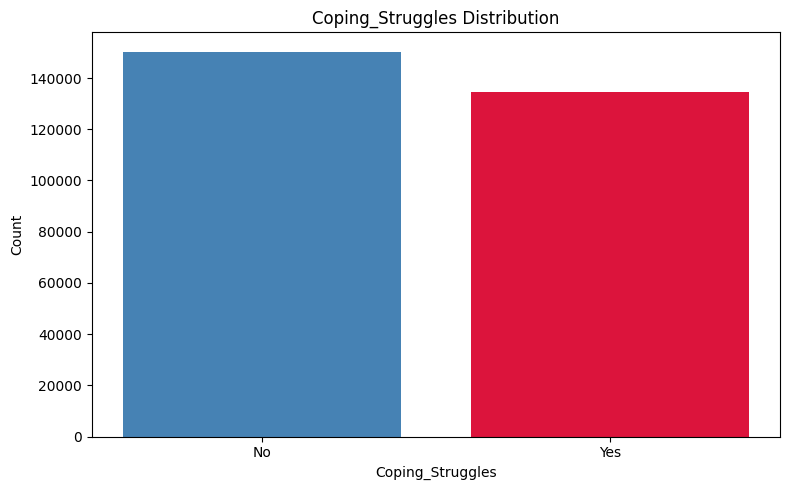

,Count,Proportion
Coping_Struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [19]:
countsplot("Coping_Struggles")

In [20]:
def top_10_bar(category, x_rotation = 45):
    """
    Plots a bar plot showing the distribution of a categorical variable for the top 10 categories.

    Args:
        category (str): The column name for the categorical variable to plot.
        x_rotation (int, optional): The number of degrees to rotate the x-axis labels. Defaults to 45.
    """
    # Get the top 10 categories and their counts in a DataFrame
    top_10_df = df[category].value_counts().head(10).reset_index()
    top_10_df.columns = [category, 'count']

    plt.figure(figsize=(8, 5))
    plt.bar(top_10_df[category], top_10_df['count'])
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.title(category)
    plt.xticks(rotation = x_rotation)
    plt.tight_layout()
    plt.show()


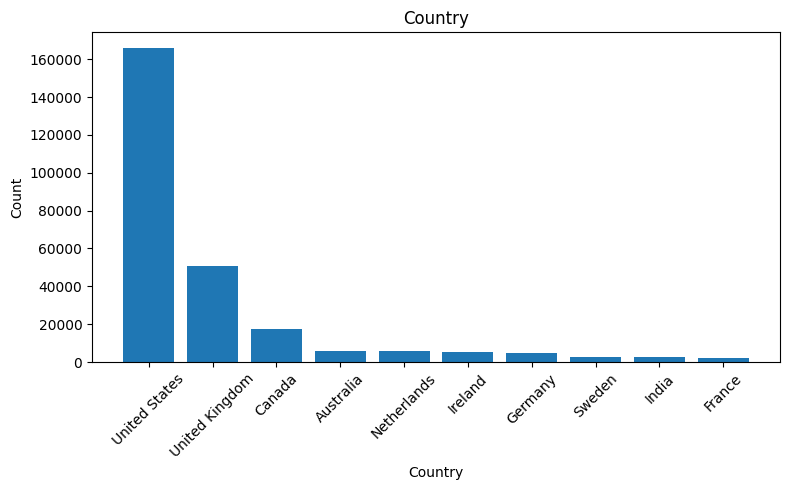

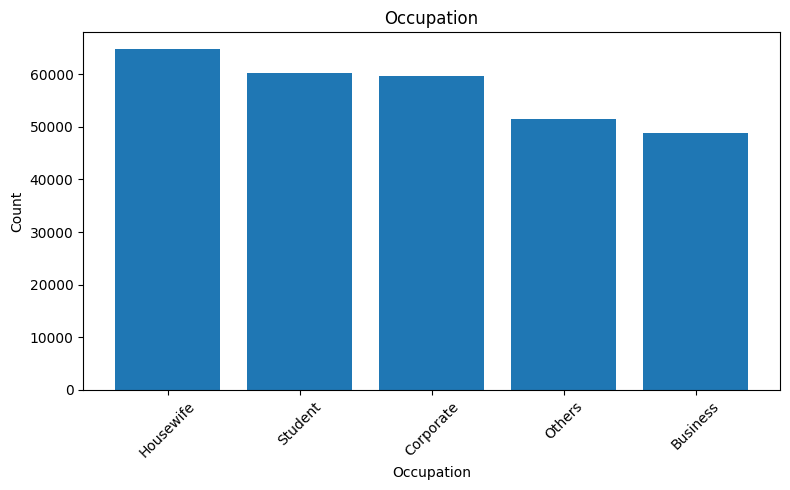

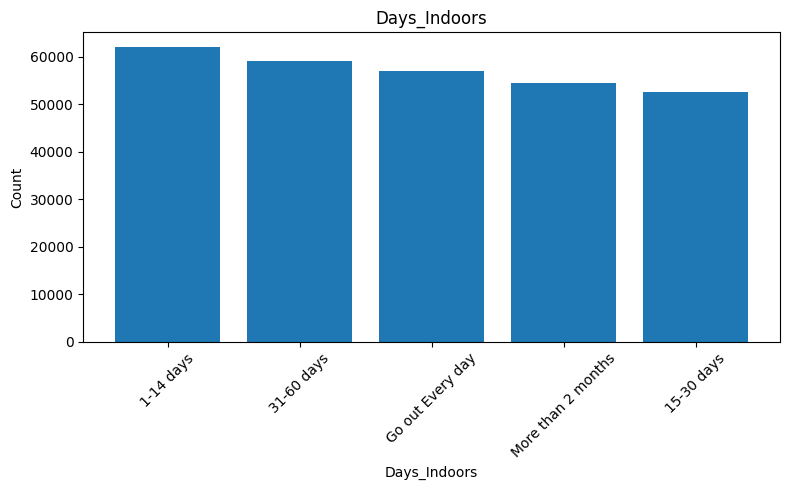

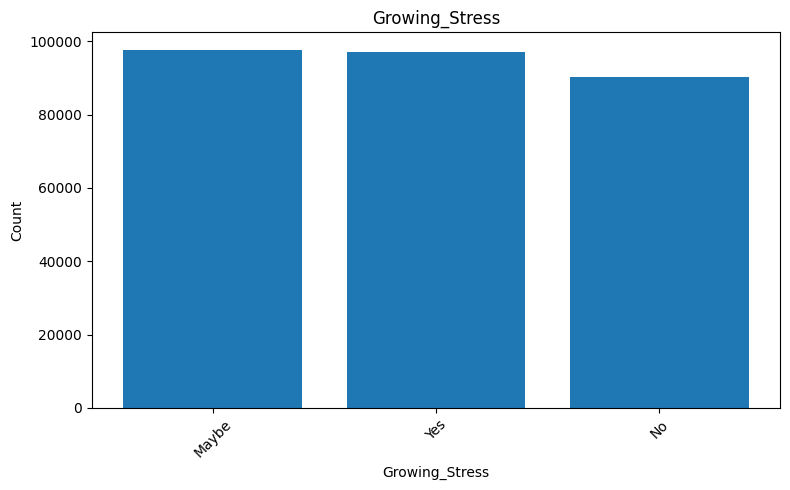

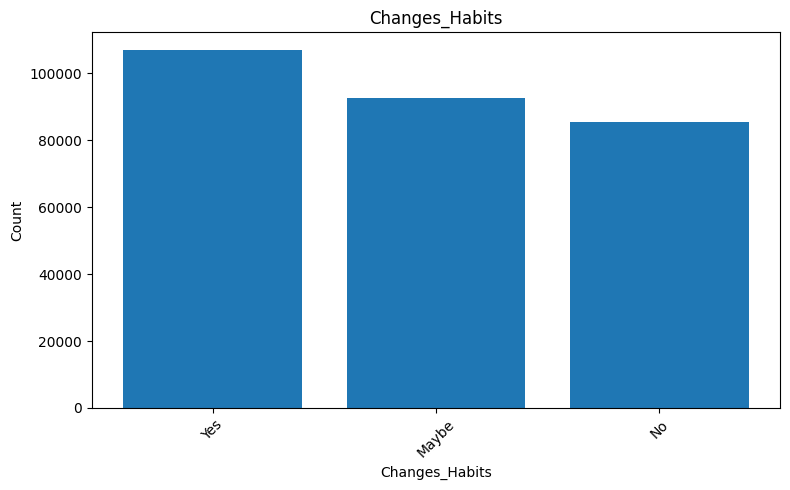

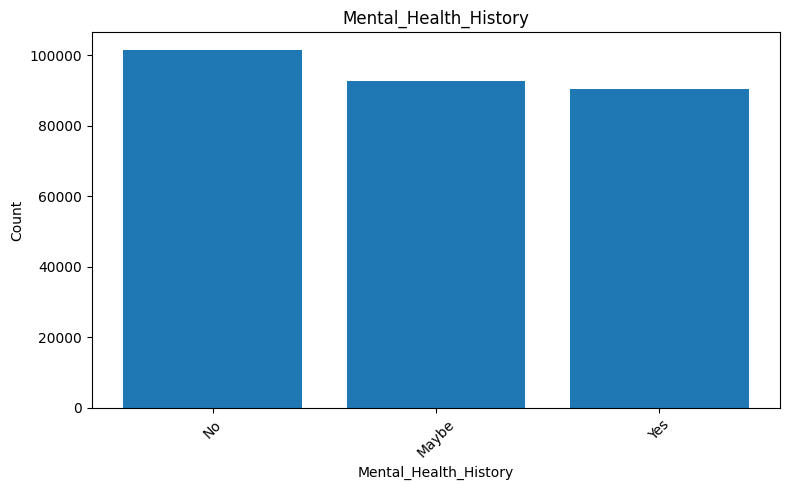

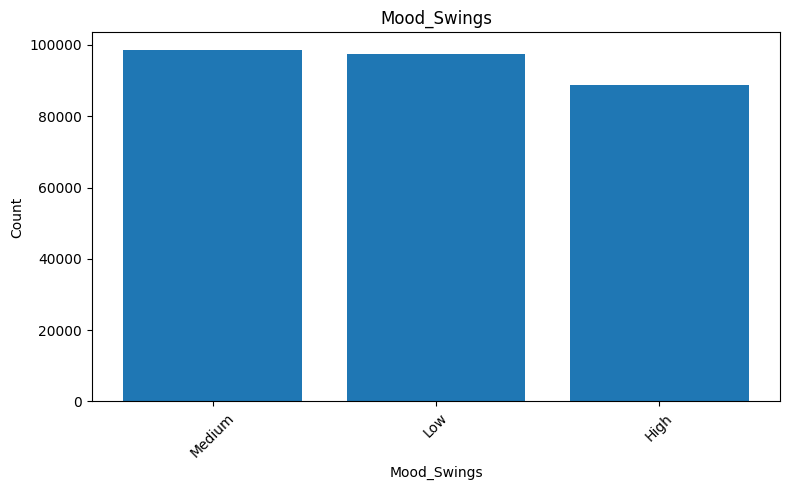

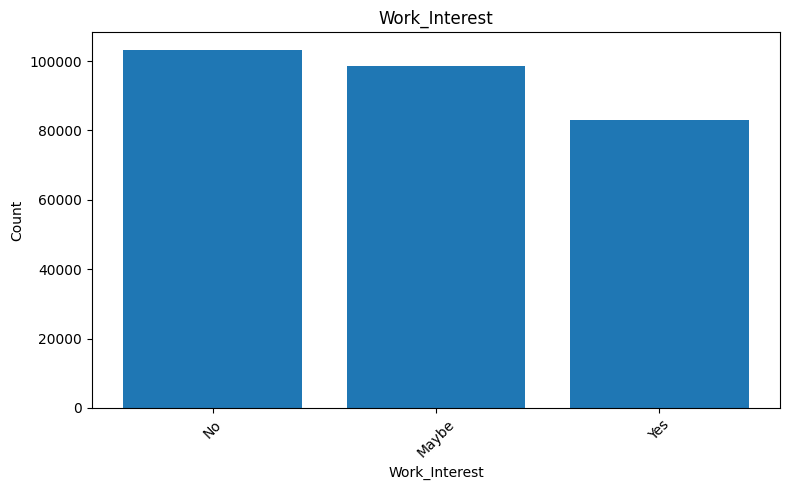

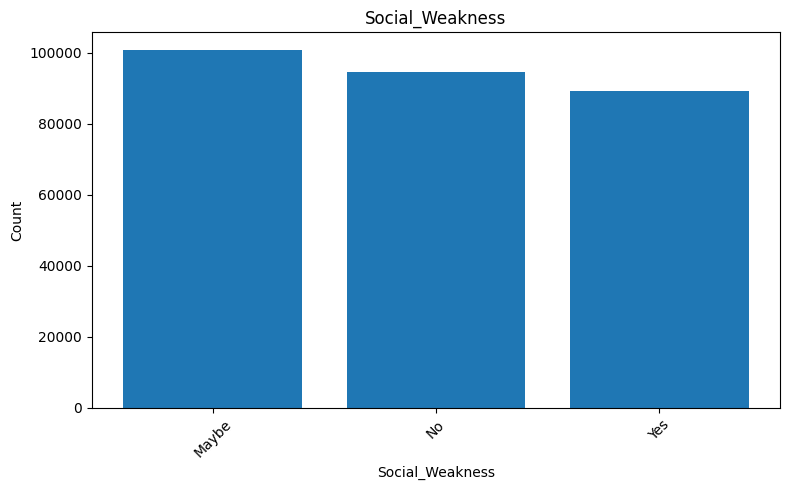

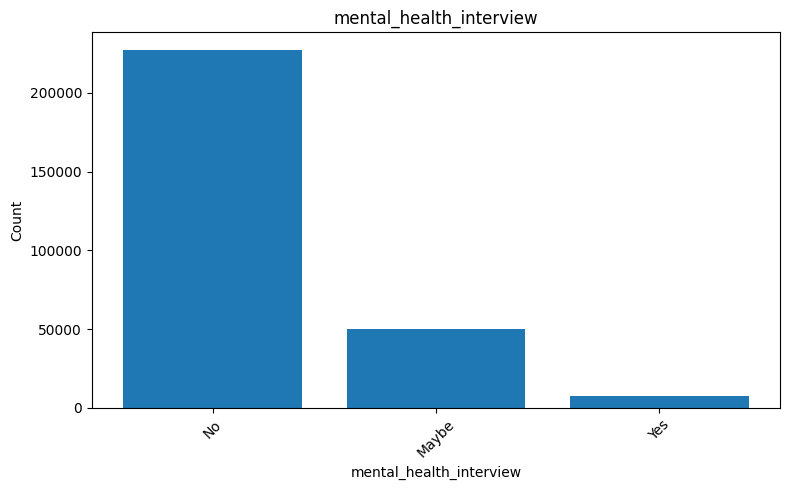

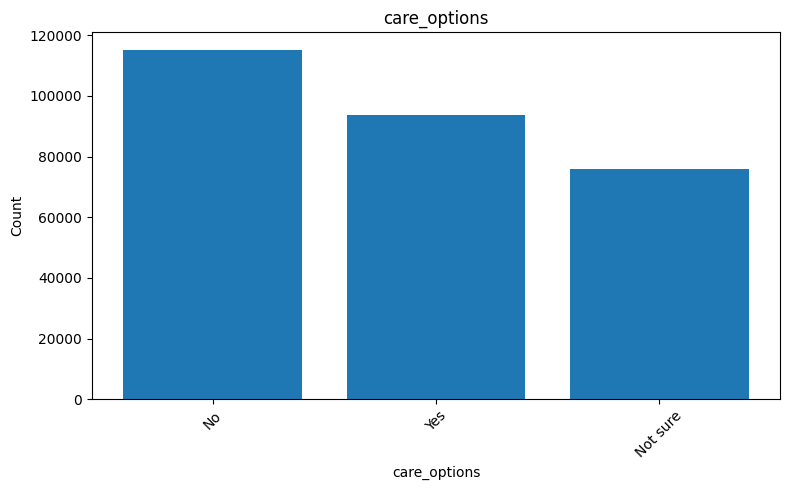

In [21]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

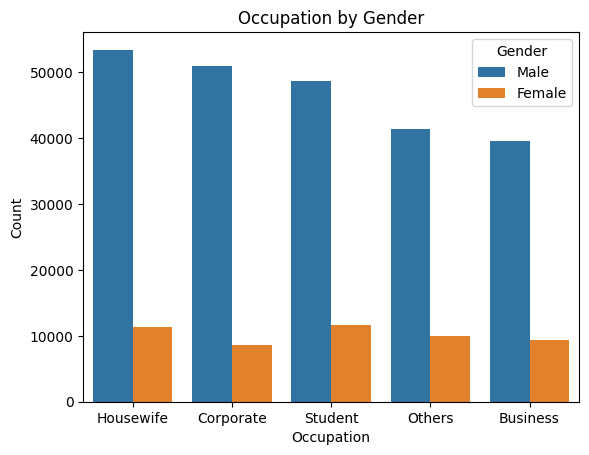

,Gender,Occupation,Count
5,Male,Housewife,53400
6,Male,Corporate,51000
7,Male,Student,48600
8,Male,Others,41400
9,Male,Business,39600
0,Female,Student,11564
1,Female,Housewife,11328
2,Female,Others,10030
3,Female,Business,9322
4,Female,Corporate,8614


In [22]:
gender_data = (
    df
    .groupby("Gender")["Occupation"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

sns.barplot(data=gender_data, x="Occupation", y="Count", hue="Gender")
plt.title("Occupation by Gender")
plt.show()

gender_data


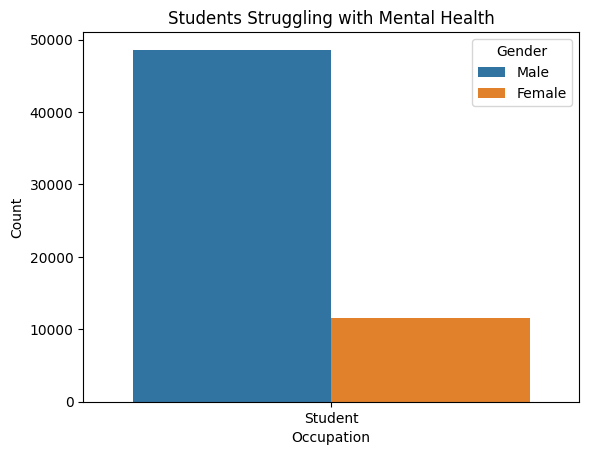

,Gender,Occupation,Count,Percentage
7,Male,Student,48600,80.8
0,Female,Student,11564,19.2


In [23]:
student_data = gender_data[gender_data["Occupation"] == "Student"]
sns.barplot(data=student_data, x="Occupation", y="Count", hue="Gender")
plt.title("Students Struggling with Mental Health")
plt.show()

total_student_count = student_data["Count"].sum()

student_data["Percentage"] = (
    student_data["Count"] / total_student_count * 100
).round(1)

student_data

In [24]:
uk_student_data = (
    df
    .loc[(df["Country"] == "United Kingdom") & (df["Occupation"] == "Student")]
    .groupby("Gender")
    .size()
    .reset_index(name = "Count")
)

total_uk_student_count = uk_student_data["Count"].sum()

uk_student_data["Percentage"] = (
    uk_student_data["Count"] / total_uk_student_count * 100
).round(1)

uk_student_data

,Gender,Count,Percentage
0,Female,1568,14.7
1,Male,9072,85.3


In [25]:
print(f"Out of {total_student_count:,} students around the world struggling with mental health, {total_uk_student_count:,} are UK students.")

Out of 60,164 students around the world struggling with mental health, 10,640 are UK students.


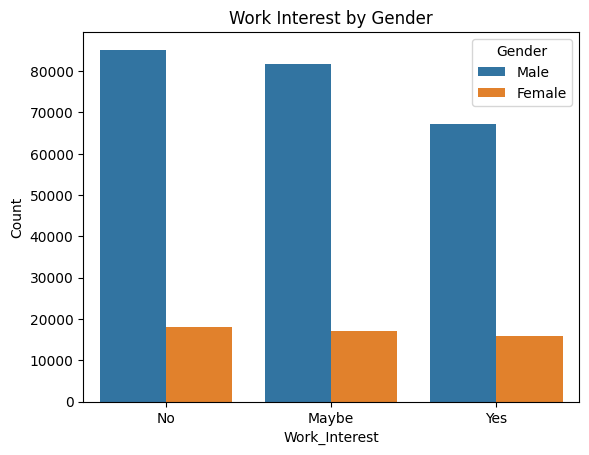

,Gender,Work_Interest,Count
3,Male,No,85200
4,Male,Maybe,81600
5,Male,Yes,67200
0,Female,No,17936
1,Female,Maybe,16992
2,Female,Yes,15930


In [26]:
work_interest_data = (
    df
    .groupby("Gender")["Work_Interest"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

sns.barplot(data=work_interest_data, x="Work_Interest", y="Count", hue="Gender")
plt.title("Work Interest by Gender")
plt.show()

work_interest_data

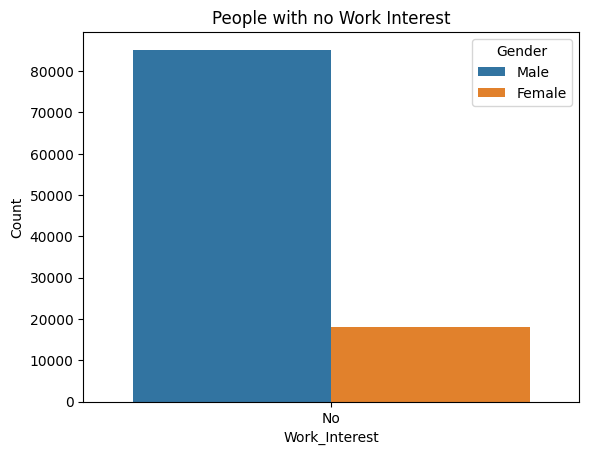

,Gender,Work_Interest,Count,Percentage
3,Male,No,85200,82.6
0,Female,No,17936,17.4


In [27]:
no_work_interest_data = work_interest_data[work_interest_data["Work_Interest"] == "No"]
sns.barplot(data=no_work_interest_data, x="Work_Interest", y="Count", hue="Gender")
plt.title("People with no Work Interest")
plt.show()

no_work_interest_count = no_work_interest_data["Count"].sum()

no_work_interest_data["Percentage"] = (
    no_work_interest_data["Count"] / no_work_interest_count * 100
).round(1)

no_work_interest_data

In [28]:
le = LabelEncoder()

encoded_df = df.apply(le.fit_transform)

encoded_df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0


In [29]:
X = encoded_df.drop("Mood_Swings", axis=1)

y = encoded_df["Mood_Swings"]
y

3         2
4         2
5         2
6         2
7         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: Mood_Swings, Length: 284858, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(227886, 15) (56972, 15)
(227886,) (56972,)


In [31]:
def pipeline_classification(pipelines):
  """
  Performs classification using cross-validation, evaluates different models,
  and makes predictions for each model on the test set.

  Args:
      pipelines (list): List of tuples containing model names and pipeline objects.

  Returns:
      pandas.DataFrame: A DataFrame containing model names, mean accuracy, standard deviation,
                        and a dictionary with test set predictions for each model.
  """

  cv_results = []
  model_names = []
  model_predictions = {}
  model_probabilities = {}

  
  for name, pipe in pipelines:
      pipe.fit(X_train, y_train)

      kfold = KFold(n_splits = 10, shuffle = True)
      cv_results.append(cross_val_score(pipe, X_train, y_train, cv = kfold, scoring = 'accuracy', n_jobs = -1))
      model_names.append(name)

      model_predictions[name] = pipe.predict(X_test)
    
      
      model_probabilities[name] = pipe.predict_proba(X_test)

  plt.boxplot(cv_results)
  plt.xticks(range(1, len(model_names) + 1), model_names)
  plt.title('Algorithm Comparison')
  plt.xlabel('Model')
  plt.ylabel('Accuracy')
  plt.show()

  results_df = pd.DataFrame({
      'Model': model_names,
      'Mean Accuracy': [scores.mean() for scores in cv_results],
      'Standard Deviation': [scores.std() for scores in cv_results]
  })

  return results_df, model_predictions, model_probabilities

In [ ]:
pipelines = [
    ('DT', Pipeline([('scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])),
    ('RF', Pipeline([('scaler', MinMaxScaler()), ('RF', RandomForestClassifier())])),
    ('XGB', Pipeline([('XGB', XGBClassifier())])),
  ]

results_df, model_predictions, model_probabilities = pipeline_classification(pipelines)
results_df

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names = None, cmap = "Blues", title = ""):
  """
  Plots a confusion matrix for classification tasks.

  Args:
      y_true (array-like): True labels for the data.
      y_pred (array-like): Predicted labels for the data.
      class_names (list, optional): List of class names for the labels.
      cmap (str, optional): Colormap to use for the heatmap. Defaults to 'Blues'.
      title (str, optional): Title for the confusion matrix plot. Defaults to an empty string.

  Returns:
      None
  """

  cm = confusion_matrix(y_true, y_pred)

  if class_names is None:
      class_names = np.unique(y_true)

  plt.figure(figsize = (8, 6))
  sns.heatmap(
      cm,
      annot = True,
      fmt = 'd',
      cmap = cmap,
      xticklabels = class_names,
      yticklabels = class_names
  )

  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [ ]:
models = results_df.loc[:, "Model"]

predictions = list(model_predictions.values())

labels = df["Mood_Swings"].unique()[::-1]

cmap_dict = {'DT': 'Blues', 'RF': 'Oranges', 'XGB': 'YlOrRd'}

for model_name, y_pred in zip(models, predictions):
  plot_confusion_matrix(
      y_test,
      y_pred,
      class_names = labels,
      cmap = cmap_dict.get(model_name),
      title = model_name
  )

In [ ]:
def get_model_scores(models, predictions, y_test, average = "None"):
  """
  Calculates and returns precision, recall, and F1 scores for each model.

  Args:
      models: A list of trained machine learning models.
      predictions: A list of predictions for each model, corresponding to the models list.
      y_test: True labels for the test set.
      average (str, optional): Averaging type for metrics.

  Returns:
      A Pandas DataFrame containing the model scores.
  """

  scores = [{
      'Model': model_name,
      'Accuracy': round(accuracy_score(y_test, y_pred), 3),
      'Precision': round(precision_score(y_test, y_pred, average = average), 3),
      'Recall': round(recall_score(y_test, y_pred, average = average), 3),
      'F1 Score': round(f1_score(y_test, y_pred, average = average), 3)
  } for model_name, y_pred in zip(models, predictions)]

  scores_df = pd.DataFrame(scores)

  return scores_df

In [ ]:
scores = get_model_scores(models, predictions, y_test, average = "macro")

scores